In [1]:
!pip install PyQt5

In [2]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QSizePolicy, QVBoxLayout, QWidget
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np

In [4]:
class ArrowAnimation(QMainWindow):
    def __init__(self):
        super(ArrowAnimation, self).__init__()

        self.initUI()

    def initUI(self):
        self.setWindowTitle('3D Arrow Animation')
        self.setGeometry(100, 100, 800, 600)

        self.main_widget = QWidget(self)
        self.setCentralWidget(self.main_widget)

        self.canvas = MatplotlibCanvas(self.main_widget, width=5, height=4, dpi=100)
        self.canvas.setSizePolicy(QSizePolicy.Expanding, QSizePolicy.Expanding)

        layout = QVBoxLayout(self.main_widget)
        layout.addWidget(self.canvas)

        self.animation = FuncAnimation(self.canvas.figure, self.update_arrow, frames=np.linspace(0, 2 * np.pi, 100),
                                       interval=50, blit=False)

    def update_arrow(self, frame):
        self.canvas.ax.cla()  # Clear the previous frame

        # Compute new arrow position
        x = np.cos(frame)
        y = np.sin(frame)
        z = frame / 10  # Adjust the scale for the z-axis motion

        # Plot the arrow
        self.canvas.ax.quiver(0, 0, 0, x, y, z, color='r', length=0.5, normalize=True)

        # Set plot limits
        self.canvas.ax.set_xlim([-1, 1])
        self.canvas.ax.set_ylim([-1, 1])
        self.canvas.ax.set_zlim([0, 10])  # Adjust the z-axis limit

        self.canvas.draw()

class MatplotlibCanvas(FigureCanvas):
    def __init__(self, parent=None, width=5, height=4, dpi=100):
        self.fig = Figure(figsize=(width, height), dpi=dpi)
        self.ax = self.fig.add_subplot(111, projection='3d')

        FigureCanvas.__init__(self, self.fig)
        self.setParent(parent)
        FigureCanvas.setSizePolicy(self, QSizePolicy.Expanding, QSizePolicy.Expanding)
        FigureCanvas.updateGeometry(self)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = ArrowAnimation()
    window.show()
    sys.exit(app.exec_())

SystemExit: 0

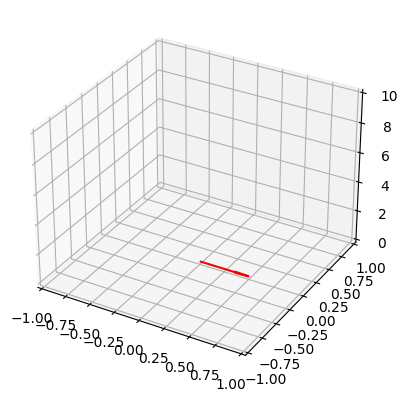

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np

# Function to update the arrow's position
def update_arrow(frame):
    ax.cla()  # Clear the previous frame

    # Compute new arrow position
    x = np.cos(frame)
    y = np.sin(frame)
    z = frame / 10  # Adjust the scale for the z-axis motion

    # Plot the arrow
    ax.quiver(0, 0, 0, x, y, z, color='r', length=0.5, normalize=True)

    # Set plot limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 10])  # Adjust the z-axis limit

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set initial arrow position
initial_frame = 0
update_arrow(initial_frame)

# Set up the animation
ani = FuncAnimation(fig, update_arrow, frames=np.linspace(0, 2 * np.pi, 100), interval=50)

# Show the plot
plt.show()